In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import os
# Path = '../../../Data/'
# Data = pd.read_csv('CIFAR_10.csv')

In [2]:
# Versobe_1 = True

# Image_Data = []
# Num_Files = 0
# for root, dirs, files in os.walk(Path+'train/'):
#     for each in files:
#         Num_Files += 1
#         img = mpimg.imread(Path+'train/'+each).transpose((2,1,0))
#         img = img.flatten()
#         img_id = np.array(int(each[:-4]))
#         Image_Data.append(np.hstack((img_id, img)))
#         if Versobe_1:
#             print(img_id)
#             print(img.shape)
#             print(each)
#             break
# ImageData = np.array(Image_Data)
# print(ImageData.shape)

In [3]:
def Image_Show(Data, Label_inverse):
    # 转成imshow需要的格式
    Show_Image = Data[1:].reshape((3, 32, 32)).transpose((1,2,0))
    plt.imshow(Show_Image)
    # Label
    print(Data[0])
    plt.title(Label_inverse[int(Data[0])])
    plt.show()
    
#Image_Show(Data[15], Label_inverse)
#Image_Show(ImageData[0])

In [ ]:
# # 读入csv数据，此中包含图像信息及其Label信息
# # ImageData = np.loadtxt(open('CIFAR_10.csv','rb'), delimiter=',', skiprows=0)

# ## 数组数据排列的测试程序
# x = np.array([[1,3], [2,3], [0,5]])
# print(x.shape)
# print(x)
# y = np.argsort(x[:,0])
# print(x[y])

# print('Start sort')
# print(ImageData.shape)
# # 按array的第一列进行排序
# ImageData_arg = np.argsort(ImageData[:,0])
# ImageData = ImageData[ImageData_arg]
# # 测试与实际的第一幅图像是否一致
# Image_Show(ImageData[0])
# # print(ImageData[ImageData_arg])

In [ ]:
# Image_Show(ImageData[2])

In [ ]:
# 将array保存为csv文件，利用numpy的API
#np.savetxt(Path+'CIFAR_10.csv', ImageData, delimiter = ',') 

# 正常文件可以直接用numpy的API进行读取
# ImageLabel = np.loadtxt(open(Path+'trainLabels.csv','rb'), delimiter=',', skiprows=0)

# 由于存在标志，因此需要借助padans来进行csv文件的读取
# ImageLabel = pd.read_csv(Path+'trainLabels.csv')

### LabelEncoder 与 One-Hot 功能测试

In [ ]:
# # print(ImageLabel)
# label_id = np.array(ImageLabel['id'])
# label = np.array(ImageLabel['label'])
# print(label)

# # 将描述型数据变换为数字表示
# encoder = preprocessing.LabelEncoder()
# interger_label = encoder.fit_transform(label).reshape(-1, 1)
# print(interger_label)
# one_hot = preprocessing.OneHotEncoder(sparse=False)
# data = one_hot.fit_transform(interger_label)
# print(data)

In [ ]:
# data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
# values = np.array(data)
# print(values)
# # integer encode
# label_encoder = preprocessing.LabelEncoder()
# integer_encoded = label_encoder.fit_transform(values).reshape(len(integer_encoded), 1)
# print(integer_encoded)
# # binary encode
# onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
# # integer_encoded = integer_encoded
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# print(onehot_encoded)

### 此处进行数组的拼接

In [ ]:
# print(label.shape)
# print(ImageData.shape)

In [3]:
# 简易二维数组拼接处理
x = np.array([[1,2],[3,4],[5,6]])
y = np.array([1, 2, 3])
print(x.shape)
print(y.shape)
# 二维数组切片测试
z = x[:,1:]
c = np.concatenate((y.reshape(1, -1).T, x), axis = 1)
print(c)
print(z)
np.random.shuffle(c)
print(c)

(3, 2)
(3,)
[[1 1 2]
 [2 3 4]
 [3 5 6]]
[[2]
 [4]
 [6]]
[[3 5 6]
 [2 3 4]
 [1 1 2]]


In [ ]:
# ImageData_1 = np.zeros((50, 3073))
# print(ImageData_1.shape)
# ImageData_1 = ImageData_1[:,1:]
# print(ImageData_1.shape)
# Train_CIFAR = np.concatenate((label.reshape(1, -1).T, ImageData), axis =1)
# print(Train_CIFAR.shape)
# print(Train_CIFAR)

## 下面是基于上述测试的，对测试数据的读取及其保存

In [4]:
# 一些全局变量
Path_Image = '../../../Data/train_1/'
Path_Label = '../../../Data/'
File_Name = 'Train_CIFAR10.csv'

### 载入图像，输出图像数组

In [5]:
def ImageDataLoad(path):
    Image_Data = []
    for root, dirs, files in os.walk(path):
        for each in files:
            img = mpimg.imread(path+each).transpose((2,1,0))
            # 将数据变成一维数组的形式
            img = img.flatten()
            # 读取图像的id
            img_id = np.array(int(each[:-4]))
            # 数据的拼接
            Image_Data.append(np.hstack((img_id, img)))
    ImageData = np.array(Image_Data)
    ImageData_arg = np.argsort(ImageData[:,0])
    Data = ImageData[ImageData_arg]
    return Data

### 将图像与标记合并，并且输出结果

In [6]:
def MixImageAndLabel(path_Image, path_Label):
    Image = ImageDataLoad(path_Image)
    Label = pd.read_csv(path_Label+'trainLabels_1.csv')
    ImageLabel = np.array(Label['label']).reshape(-1, 1)
    print(ImageLabel)
    # Label Encoder
    encoder = preprocessing.LabelEncoder()
    ImageLabel = encoder.fit_transform(ImageLabel)
    Label_inverse = np.array(list(encoder.classes_))
    # one_hot = preprocessing.OneHotEncoder(sparse=False)
    # One_hot_Label = one_hot.fit_transform(interger_label)
    ImageData = Image[:,1:]
    # print(ImageData.shape)
    # print(ImageLabel.shape)
    Data = np.concatenate((ImageLabel.reshape(1, -1).T, ImageData), axis = 1)
    # print(Data.shape)
    return Data,Label_inverse

# MixImageAndLabel(Path_Image, Path_Label)

### 保存标记与图像数据至csv文件

In [7]:
def SaveData2CSV(Data, file_name,path_Label):
    # Data = MixImageAndLabel(path_Image, path_Label)
    np.savetxt(path_Label+file_name, Data, delimiter = ',')

### 从csv文件中乱序的读取数据

In [8]:
def ReadData(file_name, path):
    Data = np.loadtxt(open(path+file_name,'rb'), delimiter=',', skiprows=0)
    np.random.shuffle(Data)
    return Data

### 数据读取函数功能测试

In [9]:
Data,Label_inverse  = MixImageAndLabel(Path_Image, Path_Label)

[['frog']
 ['truck']
 ['truck']
 ..., 
 ['bird']
 ['ship']
 ['cat']]


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
SaveData2CSV(Data, File_Name, Path_Label)

In [ ]:
# ImageData = ReadData(File_Name, Path_Label)
# Image_Show(ImageData[3], Label_inverse)
#print(Label_inverse)

In [ ]:
# Data = ImageDataLoad(Path_Image)

In [ ]:
# print(Data.shape)
# print(Data[1])

In [ ]:
# ImageData_arg = np.argsort(Data[:,0])
# ImageData = Data[ImageData_arg]

9.0


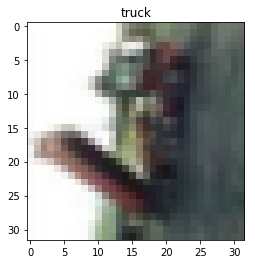

In [12]:
# print(ImageData[0])
# Image_Show(Data[2], Label_inverse)